In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [208]:
df=pd.read_csv(r"C:\Users\Mrityu\Desktop\ecoli.csv")
df.head()

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [209]:
df.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,336.00000,336.00000,336.00000,336.00000,336.00000,336.00000,336.00000
mean,0.50006,0.50000,0.49548,0.50149,0.50003,0.50018,0.49973
std,0.19463,0.14816,0.08850,0.02728,0.12238,0.21575,0.20941
min,0.00000,0.16000,0.48000,0.50000,0.00000,0.03000,0.00000
25%,0.34000,0.40000,0.48000,0.50000,0.42000,0.33000,0.35000
50%,0.50000,0.47000,0.48000,0.50000,0.49500,0.45500,0.43000
75%,0.66250,0.57000,0.48000,0.50000,0.57000,0.71000,0.71000
max,0.89000,1.00000,1.00000,1.00000,0.88000,1.00000,0.99000


In [210]:
df.shape

(336, 9)

In [211]:
df.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,336.00000,336.00000,336.00000,336.00000,336.00000,336.00000,336.00000
mean,0.50006,0.50000,0.49548,0.50149,0.50003,0.50018,0.49973
std,0.19463,0.14816,0.08850,0.02728,0.12238,0.21575,0.20941
min,0.00000,0.16000,0.48000,0.50000,0.00000,0.03000,0.00000
25%,0.34000,0.40000,0.48000,0.50000,0.42000,0.33000,0.35000
50%,0.50000,0.47000,0.48000,0.50000,0.49500,0.45500,0.43000
75%,0.66250,0.57000,0.48000,0.50000,0.57000,0.71000,0.71000
max,0.89000,1.00000,1.00000,1.00000,0.88000,1.00000,0.99000


In [212]:
df.dtypes

SEQUENCE_NAME     object
MCG              float64
GVH              float64
LIP              float64
CHG              float64
AAC              float64
ALM1             float64
ALM2             float64
SITE              object
dtype: object

In [213]:
print(df['SITE'].unique())
print(len(df['SITE'].unique()))

['cp' 'im' 'imS' 'imL' 'imU' 'om' 'omL' 'pp']
8


In [214]:
print(df.groupby(['SITE']).agg(['count']))

     SEQUENCE_NAME   MCG   GVH   LIP   CHG   AAC  ALM1  ALM2
             count count count count count count count count
SITE                                                        
cp             143   143   143   143   143   143   143   143
im              77    77    77    77    77    77    77    77
imL              2     2     2     2     2     2     2     2
imS              2     2     2     2     2     2     2     2
imU             35    35    35    35    35    35    35    35
om              20    20    20    20    20    20    20    20
omL              5     5     5     5     5     5     5     5
pp              52    52    52    52    52    52    52    52


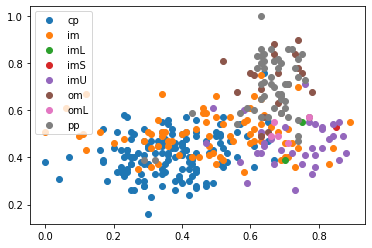

In [215]:
groups = df.groupby(['SITE'])
# Plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.MCG, group.GVH, marker='o', linestyle='', label=name)
ax.legend(numpoints=1, loc='upper left')

plt.show()

<AxesSubplot:xlabel='MCG', ylabel='GVH'>

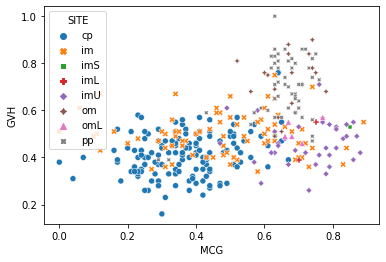

In [216]:
sns.scatterplot(x=df.MCG, y=df.GVH, hue=df.SITE, style = df.SITE)

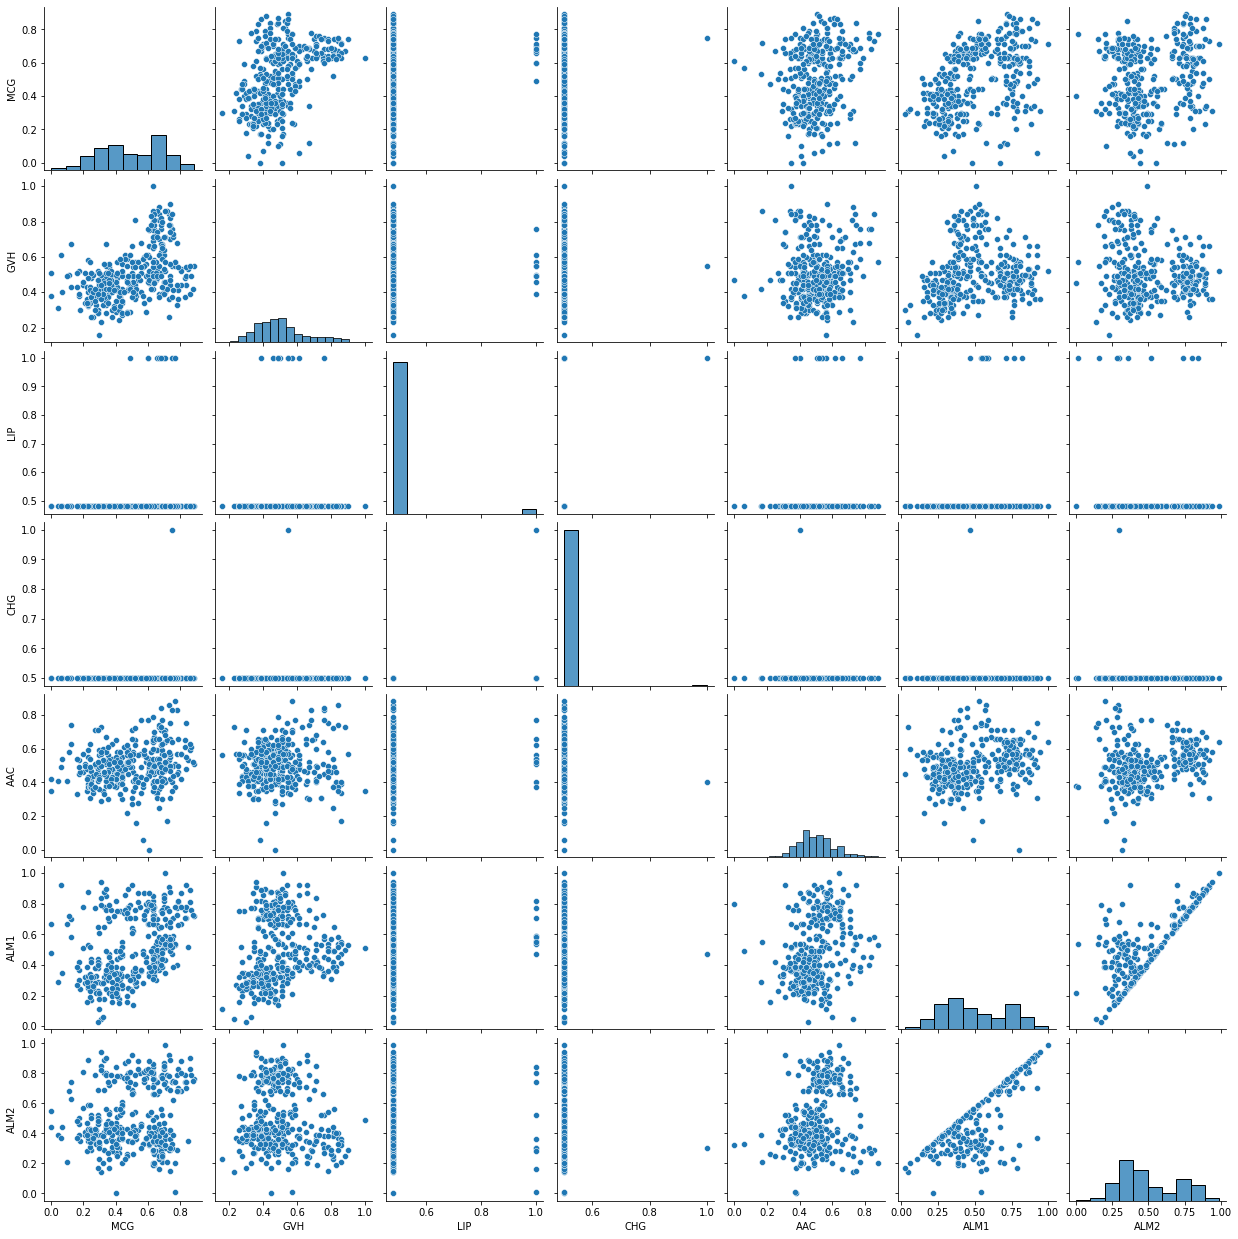

In [217]:
sns.pairplot(df)

In [218]:
X=df.iloc[:,1:7]
print(X.head())
y=df.iloc[:,8]
print(y.head())

    MCG   GVH   LIP  CHG   AAC  ALM1
0  0.49  0.29  0.48  0.5  0.56  0.24
1  0.07  0.40  0.48  0.5  0.54  0.35
2  0.56  0.40  0.48  0.5  0.49  0.37
3  0.59  0.49  0.48  0.5  0.52  0.45
4  0.23  0.32  0.48  0.5  0.55  0.25
0    cp
1    cp
2    cp
3    cp
4    cp
Name: SITE, dtype: object


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Size of X:", X.shape)
print("Size of y:", y.shape)
print("Size of X_train:", X_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_test:", y_test.shape)

Size of X: (336, 6)
Size of y: (336,)
Size of X_train: (235, 6)
Size of y_train: (235,)
Size of X_test: (101, 6)
Size of y_test: (101,)


In [220]:
#Threshold for removing correlated variables
threshold = 0.9

#Absolute value correlation matrix
corr_matrix = X_train.corr().abs()
corr_matrix.head()

,MCG,GVH,LIP,CHG,AAC,ALM1
MCG,1.00000,0.44750,0.15873,0.08200,0.17542,0.37206
GVH,0.44750,1.00000,0.05822,0.02139,0.01387,0.14970
LIP,0.15873,0.05822,1.00000,0.34823,0.06864,0.09551
CHG,0.08200,0.02139,0.34823,1.00000,0.04920,0.00834
AAC,0.17542,0.01387,0.06864,0.04920,1.00000,0.23835


In [221]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

<ipython-input-221-b8b02147a528>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,MCG,GVH,LIP,CHG,AAC,ALM1
MCG,NaN,0.4475,0.15873,0.08200,0.17542,0.37206
GVH,NaN,NaN,0.05822,0.02139,0.01387,0.14970
LIP,NaN,NaN,NaN,0.34823,0.06864,0.09551
CHG,NaN,NaN,NaN,NaN,0.04920,0.00834
AAC,NaN,NaN,NaN,NaN,NaN,0.23835


In [222]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 0 columns to remove.


# RANDOM FOREST

In [223]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [224]:
rt_clf = RandomForestClassifier(criterion='gini', random_state=123)
rt_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [225]:
rt_clf.feature_importances_

array([0.25243041, 0.17672125, 0.0294138 , 0.00284106, 0.14222834,
       0.39636514])

In [226]:
y_pred = rt_clf.predict(X_test)

In [227]:
print("Accuracy : {}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy : 88.11881188118812%
Classification Report: 
               precision    recall  f1-score   support

          cp       0.94      1.00      0.97        46
          im       0.74      0.85      0.79        20
         imS       0.00      0.00      0.00         1
         imU       0.88      0.64      0.74        11
          om       1.00      0.86      0.92         7
         omL       1.00      1.00      1.00         1
          pp       0.86      0.80      0.83        15

    accuracy                           0.88       101
   macro avg       0.77      0.73      0.75       101
weighted avg       0.88      0.88      0.87       101



c:\users\mrityu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mrityu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mrityu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Random Forest with Entropy

In [228]:
rt_clf = RandomForestClassifier(criterion="entropy", random_state=123)
rt_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=123)

In [229]:
rt_clf.feature_importances_

array([0.24709587, 0.1716448 , 0.04157014, 0.00217003, 0.13057469,
       0.40694446])

In [230]:
y_pred = rt_clf.predict(X_test)

In [231]:
print("Accuracy : {}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy : 87.12871287128714%
Classification Report: 
               precision    recall  f1-score   support

          cp       0.94      1.00      0.97        46
          im       0.71      0.85      0.77        20
         imS       0.00      0.00      0.00         1
         imU       0.86      0.55      0.67        11
          om       1.00      0.86      0.92         7
         omL       1.00      1.00      1.00         1
          pp       0.86      0.80      0.83        15

    accuracy                           0.87       101
   macro avg       0.77      0.72      0.74       101
weighted avg       0.87      0.87      0.86       101



c:\users\mrityu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mrityu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mrityu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Decision Tree

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree with Gini

In [233]:
df_clf = DecisionTreeClassifier(criterion='gini', random_state=123)
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [234]:
df_clf.feature_importances_

array([0.36992095, 0.09917599, 0.05123132, 0.        , 0.12510336,
       0.35456838])

In [235]:
y_pred = df_clf.predict(X_test)

In [236]:
print("Accuracy : {}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy : 84.15841584158416%
Classification Report: 
               precision    recall  f1-score   support

          cp       0.94      0.96      0.95        46
          im       0.71      0.75      0.73        20
         imS       0.00      0.00      0.00         1
         imU       0.78      0.64      0.70        11
          om       0.86      0.86      0.86         7
         omL       1.00      1.00      1.00         1
          pp       0.80      0.80      0.80        15

    accuracy                           0.84       101
   macro avg       0.73      0.71      0.72       101
weighted avg       0.84      0.84      0.84       101



# Decision Tree with Entropy

In [237]:
df_clf = DecisionTreeClassifier(criterion='entropy', random_state=123)
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

In [238]:
df_clf.feature_importances_

array([0.29123916, 0.11613149, 0.0682527 , 0.00532427, 0.09493603,
       0.42411634])

In [239]:
y_pred = df_clf.predict(X_test)

In [240]:
print("Accuracy : {}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy : 85.14851485148515%
Classification Report: 
               precision    recall  f1-score   support

          cp       0.94      0.98      0.96        46
          im       0.71      0.75      0.73        20
         imS       0.00      0.00      0.00         1
         imU       0.88      0.64      0.74        11
          om       0.83      0.71      0.77         7
         omL       1.00      1.00      1.00         1
          pp       0.81      0.87      0.84        15

    accuracy                           0.85       101
   macro avg       0.74      0.71      0.72       101
weighted avg       0.85      0.85      0.85       101

